In [100]:
# clear memory
%reset -f

In [101]:
# import libraries
import numpy as np
import pandas as pd

import sklearn
from sklearn.linear_model import LinearRegression, LassoCV, Ridge, Lasso, RidgeCV
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import SelectFromModel, VarianceThreshold, SelectKBest, f_regression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
import gc
import matplotlib.pyplot as plt

In [6]:
# Impute missing values

def fillMissing_background(inputcsv, outputcsv):
    
    # read input csv - takes time
    df = pd.read_csv(inputcsv, low_memory=False)
    # Fix date bug
    df.cf4fint = ((pd.to_datetime(df.cf4fint) - pd.to_datetime('1960-01-01')) / np.timedelta64(1, 'D')).astype(int)
    
    # replace NA's with mode
    df = df.fillna(df.mode().iloc[0])
    # if still NA, replace with 1
    df = df.fillna(value=1)
    # replace negative values with 1
    num = df._get_numeric_data()
    num[num < 0] = 1
    # write filled outputcsv
    df.to_csv(outputcsv, index=False)
    
def fillMissing_train(inputcsv, outputcsv):
    
    # read input csv - takes time
    df = pd.read_csv(inputcsv, low_memory=False)
  
    # replace negative values with 1
    num = df._get_numeric_data()
    num[num < 0] = 1
    # write filled outputcsv
    df.to_csv(outputcsv, index=False)    
    
# Usage:
fillMissing_background('../Data/background.csv', '../Data/background_nomiss.csv')
fillMissing_train('../Data/train.csv', '../Data/train_nomiss.csv')

In [102]:
# import background variables
X = pd.read_csv('../Data/background_nomiss.csv', low_memory=False)

# restrict to constructed variables
filter_col = [col for col in X if col.startswith('c')]
X_constr=X[filter_col]

# restrict to numeric variables
X_constr=X_constr.select_dtypes(include=['number'])

In [103]:
# open meta data
meta = pd.read_csv('../Data/FFMetadata20180221.csv', low_memory=False)

meta_edu = meta[(meta['umbrella1'] == 'Education and school')]
meta_dem = meta[(meta['umbrella1'] == 'Demographics')]
meta_fin = meta[(meta['umbrella1'] == 'Finances')]
meta_cog = meta[(meta['umbrella1'] == 'Cognitive and behavioral development')]
meta_hea = meta[(meta['umbrella1'] == 'Health and health behavior')]

In [104]:
### All variables

# 1) restrict to continuous and binary variables
meta_cont = meta[(meta['type'] == 'cont') | (meta['type'] == 'bin')]

# restrict meta data to variables that also appear in the data
meta_cont_list = meta_cont['new_name'].tolist()
X_list=list(X_constr.columns.values)
intersection=list(set(meta_cont_list) & set(X_list))
meta_cont=meta_cont.loc[meta['new_name'].isin(X_list)]

# restrict data to continuous and binary variables
X_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_cat = meta[(meta['type'] == 'uc') | (meta['type'] == 'oc')]

# restrict meta data to variables that also appear in the data
meta_cat_list = meta_cat['new_name'].tolist()
X_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_cat_list) & set(X_list2))
meta_cat=meta_cat.loc[meta['new_name'].isin(X_list2)]

# restrict data to categorial variables
X_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_dum=pd.get_dummies(X_cat, columns=X_cat)

# 3) combine continuous and dummy variables
X_id=X['challengeID']
X_clean = pd.concat([X_id,X_cont, X_dum], axis=1)

In [105]:
### Education variables

# 1) restrict to continuous and binary variables
meta_edu_cont = meta_edu[(meta_edu['type'] == 'cont') | (meta_edu['type'] == 'bin')]

# restrict meta_edu data to variables that also appear in the data
meta_edu_cont_list = meta_edu_cont['new_name'].tolist()
X_edu_list=list(X_constr.columns.values)
intersection=list(set(meta_edu_cont_list) & set(X_edu_list))
meta_edu_cont=meta_edu_cont.loc[meta_edu['new_name'].isin(X_edu_list)]

# restrict data to continuous and binary variables
X_edu_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_edu_cat = meta_edu[(meta_edu['type'] == 'uc') | (meta_edu['type'] == 'oc')]

# restrict meta_edu data to variables that also appear in the data
meta_edu_cat_list = meta_edu_cat['new_name'].tolist()
X_edu_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_edu_cat_list) & set(X_edu_list2))
meta_edu_cat=meta_edu_cat.loc[meta_edu['new_name'].isin(X_edu_list2)]

# restrict data to categorial variables
X_edu_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_edu_dum=pd.get_dummies(X_edu_cat, columns=X_edu_cat)

# 3) combine continuous and dummy variables
X_edu_clean = pd.concat([X_id,X_edu_cont, X_edu_dum], axis=1)

In [106]:
### Demographics variables

# 1) restrict to continuous and binary variables
meta_dem_cont = meta_dem[(meta_dem['type'] == 'cont') | (meta_dem['type'] == 'bin')]

# restrict meta_dem data to variables that also appear in the data
meta_dem_cont_list = meta_dem_cont['new_name'].tolist()
X_dem_list=list(X_constr.columns.values)
intersection=list(set(meta_dem_cont_list) & set(X_dem_list))
meta_dem_cont=meta_dem_cont.loc[meta_dem['new_name'].isin(X_dem_list)]

# restrict data to continuous and binary variables
X_dem_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_dem_cat = meta_dem[(meta_dem['type'] == 'uc') | (meta_dem['type'] == 'oc')]

# restrict meta_dem data to variables that also appear in the data
meta_dem_cat_list = meta_dem_cat['new_name'].tolist()
X_dem_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_dem_cat_list) & set(X_dem_list2))
meta_dem_cat=meta_dem_cat.loc[meta_dem['new_name'].isin(X_dem_list2)]

# restrict data to categorial variables
X_dem_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_dem_dum=pd.get_dummies(X_dem_cat, columns=X_dem_cat)

# 3) combine continuous and dummy variables
X_dem_clean = pd.concat([X_id,X_dem_cont, X_dem_dum], axis=1)

In [107]:
### Finance variables

# 1) restrict to continuous and binary variables
meta_fin_cont = meta_fin[(meta_fin['type'] == 'cont') | (meta_fin['type'] == 'bin')]

# restrict meta_fin data to variables that also appear in the data
meta_fin_cont_list = meta_fin_cont['new_name'].tolist()
X_fin_list=list(X_constr.columns.values)
intersection=list(set(meta_fin_cont_list) & set(X_fin_list))
meta_fin_cont=meta_fin_cont.loc[meta_fin['new_name'].isin(X_fin_list)]

# restrict data to continuous and binary variables
X_fin_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_fin_cat = meta_fin[(meta_fin['type'] == 'uc') | (meta_fin['type'] == 'oc')]

# restrict meta_fin data to variables that also appear in the data
meta_fin_cat_list = meta_fin_cat['new_name'].tolist()
X_fin_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_fin_cat_list) & set(X_fin_list2))
meta_fin_cat=meta_fin_cat.loc[meta_fin['new_name'].isin(X_fin_list2)]

# restrict data to categorial variables
X_fin_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_fin_dum=pd.get_dummies(X_fin_cat, columns=X_fin_cat)

# 3) combine continuous and dummy variables
X_fin_clean = pd.concat([X_id,X_fin_cont, X_fin_dum], axis=1)

In [108]:
### Cognitive variables

# 1) restrict to continuous and binary variables
meta_cog_cont = meta_cog[(meta_cog['type'] == 'cont') | (meta_cog['type'] == 'bin')]

# restrict meta_cog data to variables that also appear in the data
meta_cog_cont_list = meta_cog_cont['new_name'].tolist()
X_cog_list=list(X_constr.columns.values)
intersection=list(set(meta_cog_cont_list) & set(X_cog_list))
meta_cog_cont=meta_cog_cont.loc[meta_cog['new_name'].isin(X_cog_list)]

# restrict data to continuous and binary variables
X_cog_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_cog_cat = meta_cog[(meta_cog['type'] == 'uc') | (meta_cog['type'] == 'oc')]

# restrict meta_cog data to variables that also appear in the data
meta_cog_cat_list = meta_cog_cat['new_name'].tolist()
X_cog_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_cog_cat_list) & set(X_cog_list2))
meta_cog_cat=meta_cog_cat.loc[meta_cog['new_name'].isin(X_cog_list2)]

# restrict data to categorial variables
X_cog_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_cog_dum=pd.get_dummies(X_cog_cat, columns=X_cog_cat)

# 3) combine continuous and dummy variables
X_cog_clean = pd.concat([X_id,X_cog_cont, X_cog_dum], axis=1)

In [109]:
### Health variables

# 1) restrict to continuous and binary variables
meta_hea_cont = meta_hea[(meta_hea['type'] == 'cont') | (meta_hea['type'] == 'bin')]

# restrict meta_hea data to variables that also appear in the data
meta_hea_cont_list = meta_hea_cont['new_name'].tolist()
X_hea_list=list(X_constr.columns.values)
intersection=list(set(meta_hea_cont_list) & set(X_hea_list))
meta_hea_cont=meta_hea_cont.loc[meta_hea['new_name'].isin(X_hea_list)]

# restrict data to continuous and binary variables
X_hea_cont = X_constr[intersection]

# 2) restrict to categorial variables
meta_hea_cat = meta_hea[(meta_hea['type'] == 'uc') | (meta_hea['type'] == 'oc')]

# restrict meta_hea data to variables that also appear in the data
meta_hea_cat_list = meta_hea_cat['new_name'].tolist()
X_hea_list2=list(X_constr.columns.values)
intersection_cat=list(set(meta_hea_cat_list) & set(X_hea_list2))
meta_hea_cat=meta_hea_cat.loc[meta_hea['new_name'].isin(X_hea_list2)]

# restrict data to categorial variables
X_hea_cat = X_constr[intersection_cat]

# convert all categorial variables to dummies
X_hea_dum=pd.get_dummies(X_hea_cat, columns=X_hea_cat)

# 3) combine continuous and dummy variables
X_hea_clean = pd.concat([X_id,X_hea_cont, X_hea_dum], axis=1)

In [110]:
# import outcomes
Y = pd.read_csv('../Data/train_nomiss.csv', low_memory=False)
Y = Y[np.isfinite(Y['gpa'])]

In [111]:
# Create joint datasets
data=pd.merge(X_clean, Y, on='challengeID', how='inner')

In [112]:
# Show data
data

,challengeID,ch4ppvtraw_m,ce3datey,cf4citsm,cf5hhincb,cf5span,cm5gmom,cf4povcob,cm1inpov,ch4wjsc22,...,cf4hhimp_2,cf4hhimp_3,cf4hhimp_5,cf4hhimp_6,gpa,grit,materialHardship,eviction,layoff,jobTraining
0,7,1,1,1,86414.090990,0,0,2.038775,3.385000,356,...,0,0,0,0,2.50,3.25,0.000000,0.0,0.0,0.0
1,9,1,1,1,56496.377760,0,0,2.003133,1.730770,362,...,1,0,0,0,2.25,4.00,0.181818,0.0,0.0,0.0
2,10,1,1,1,46346.390030,0,1,6.431582,4.363956,1,...,0,0,1,0,3.25,3.25,0.090909,0.0,NaN,0.0
3,13,1,1,1,91709.443430,0,0,2.893615,2.955537,398,...,0,0,1,0,2.75,4.00,0.181818,0.0,0.0,1.0
4,14,1,1,1,45035.861600,0,0,0.748168,1.484693,1,...,1,0,0,0,3.25,2.75,0.272727,0.0,1.0,0.0
5,16,1,1,1,34140.312920,0,0,1.524380,0.094871,376,...,0,0,1,0,2.00,3.50,0.090909,0.0,0.0,1.0
6,18,1,1,1,10950.866110,0,0,3.835618,0.000000,398,...,0,0,1,0,2.25,3.00,0.000000,0.0,1.0,0.0
7,23,1,1,1,12055.290520,0,0,0.696713,2.810658,1,...,0,0,1,0,2.50,3.25,0.000000,0.0,0.0,0.0
8,24,1,1,1,1.000000,1,0,1.738562,1.083732,398,...,0,0,1,0,3.25,3.50,0.090909,0.0,0.0,1.0
9,30,1,1,1,73099.796280,0,0,1.000000,3.017777,404,...,0,0,0,0,3.00,4.00,0.090909,0.0,1.0,0.0


In [113]:
# Restrict X to features
X_construct=data.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

# Create training and testing sample
X_construct_train, X_construct_test, y_train, y_test = train_test_split(X_construct, Y, test_size=0.4, random_state=0)

In [114]:
data_edu_train=pd.merge(X_edu_clean, y_train, on='challengeID', how='inner')
data_edu_test=pd.merge(X_edu_clean, y_test, on='challengeID', how='inner')

data_fin_train=pd.merge(X_fin_clean, y_train, on='challengeID', how='inner')
data_fin_test=pd.merge(X_fin_clean, y_test, on='challengeID', how='inner')

data_hea_train=pd.merge(X_hea_clean, y_train, on='challengeID', how='inner')
data_hea_test=pd.merge(X_hea_clean, y_test, on='challengeID', how='inner')

data_dem_train=pd.merge(X_dem_clean, y_train, on='challengeID', how='inner')
data_dem_test=pd.merge(X_dem_clean, y_test, on='challengeID', how='inner')

data_cog_train=pd.merge(X_cog_clean, y_train, on='challengeID', how='inner')
data_cog_test=pd.merge(X_cog_clean, y_test, on='challengeID', how='inner')

In [115]:
# Restrict Y to gpa
y_train=y_train.drop(['challengeID','grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
y_test=y_test.drop(['challengeID','grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
Y=Y.drop(['challengeID','grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

# Restrict X to features
X_edu_construct_train=data_edu_train.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
X_edu_construct_test=data_edu_test.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

X_fin_construct_train=data_fin_train.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
X_fin_construct_test=data_fin_test.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

X_hea_construct_train=data_hea_train.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
X_hea_construct_test=data_hea_test.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

X_dem_construct_train=data_dem_train.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
X_dem_construct_test=data_dem_test.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

X_cog_construct_train=data_cog_train.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)
X_cog_construct_test=data_cog_test.drop(['challengeID', 'gpa', 'grit','materialHardship','eviction','jobTraining','layoff'], axis=1)

In [146]:
#Benchmark Case: Testing y-hat = mean GPA for all i
mean_gpa = np.mean(y_train)
mean_y = [mean_gpa for i in range(y_test.shape[0])]
print('MSE (All): = %0.2f' % mean_squared_error(y_test, mean_y))
mse_list=[mean_squared_error(y_test, mean_y)]

MSE (All): = 0.45


In [147]:
# Run linear regression with education variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_edu_construct_train, y_train)
gpa_pred = linear.predict(X_edu_construct_test)

# Print results 
print('MSE (Education): = %0.2f' % mean_squared_error(y_test, gpa_pred))
mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Education): = 0.45


In [148]:
# Run linear regression with financial variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_fin_construct_train, y_train)
gpa_pred = linear.predict(X_fin_construct_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]
# Print results 
print('MSE (Finance): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Finance): = 0.58


In [149]:
# Run linear regression with health variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_hea_construct_train, y_train)
gpa_pred = linear.predict(X_hea_construct_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]
# Print results 
print('MSE (Health): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Health): = 0.60


In [150]:
# Run linear regression with demographic variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_dem_construct_train, y_train)
gpa_pred = linear.predict(X_dem_construct_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]
# Print results 
print('MSE (Demographic): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Demographic): = 0.50


In [151]:
# Run linear regression with cognitive variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_cog_construct_train, y_train)
gpa_pred = linear.predict(X_cog_construct_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]
# Print results 
print('MSE (Cognitive): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Cognitive): = 0.70


In [152]:
# Run linear regression with all selected variables
X_select_test= pd.concat([X_edu_construct_test,X_fin_construct_test, X_cog_construct_test, X_dem_construct_test, X_hea_construct_test], axis=1)
X_select_train= pd.concat([X_edu_construct_train,X_fin_construct_train, X_cog_construct_train, X_dem_construct_train, X_hea_construct_train], axis=1)

linear = LinearRegression(fit_intercept=True)
linear.fit(X_select_train, y_train)
gpa_pred = linear.predict(X_select_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]
# Print results 
print('MSE (Selected): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

#mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (Selected): = 1.41


In [153]:
# Run linear regression with all variables
linear = LinearRegression(fit_intercept=True)
linear.fit(X_construct_train, y_train)
gpa_pred = linear.predict(X_construct_test)
gpa_pred_fix = [4 if x > 4 else x for x in gpa_pred]
gpa_pred_fix = [0 if x < 0 else x for x in gpa_pred_fix]

# Print results 
print('MSE (All): = %0.2f' % mean_squared_error(y_test, gpa_pred_fix))

#mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (All): = 3.17


In [168]:
# Run lasso regression 
lasso = LassoCV()
lasso.fit(X_construct_train, y_train)
lasso_pred = lasso.predict(X_construct_test)

# Print results 
print('MSE (All): = %0.2f' % mean_squared_error(y_test, lasso_pred))

mse_list.append(mean_squared_error(y_test, gpa_pred))

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE (All): = 0.40


In [155]:
# Run ridge regression 
ridge = RidgeCV()
ridge.fit(X_construct_train, y_train)
gpa_pred = ridge.predict(X_construct_test)

# Print results 
print('MSE (All): = %0.2f' % mean_squared_error(y_test, gpa_pred))

mse_list.append(mean_squared_error(y_test, gpa_pred))

MSE (All): = 0.64


In [156]:
# Feature selection using Lasso
clf = LassoCV()
sfm = SelectFromModel(clf, threshold=1e-8)

sfm.fit(X_construct_train, y_train)
feature_idx = sfm.get_support()
feature_name = X_construct_train.columns[feature_idx]
X_sparse_train=X_construct_train.loc[:,feature_idx]
X_sparse_test=X_construct_test.loc[:,feature_idx]

# Add interactions
poly = PolynomialFeatures(interaction_only=True,include_bias = False)
X_sparse_interact_train=poly.fit_transform(X_sparse_train)
X_sparse_interact_test=poly.fit_transform(X_sparse_test)

# Run linear regression with sparse controls + interactions
linear = LinearRegression()
linear.fit(X_sparse_interact_train, y_train)
gpa_pred = linear.predict(X_sparse_interact_test)

# Print results 
print('MSE (All): = %0.2f' % mean_squared_error(y_test, gpa_pred))

mse_list.append(mean_squared_error(y_test, gpa_pred))

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/sklearn/linear_model/coordinate_descent.py:1082: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MSE (All): = 0.43


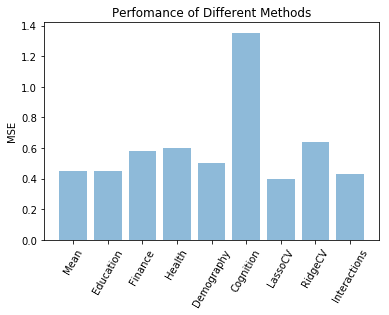

In [158]:
objects = ('Mean','Education', 'Finance', 'Health', 'Demography', 'Cognition', 'LassoCV', 'RidgeCV','Interactions')
y_pos = np.arange(len(mse_list))
plt.bar(y_pos, mse_list, align='center', alpha=0.5)
plt.xticks(y_pos, objects,rotation=60)
plt.ylabel('MSE')
plt.title('Perfomance of Different Methods')
 
plt.show()

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/sklearn/utils/validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/rachelanderson/anaconda/lib/python3.6/site-packages/sklearn/feature_selection/univariate_selection.py:279: RuntimeWarning: invalid value encountered in true_divide
  corr /= row_norms(X.T)
/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in greater
  return (self.a < x) & (x < self.b)
/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:879: RuntimeWarning: invalid value encountered in less
  return (self.a < x) & (x < self.b)
/Users/rachelanderson/anaconda/lib/python3.6/site-packages/scipy/stats/_distn_infrastructure.py:1818: RuntimeWarning: invalid value encountered 

MSE (1 Best): = 0.4138
MSE (2 Best): = 0.4009
MSE (3 Best): = 0.4007
MSE (4 Best): = 0.3976
MSE (5 Best): = 0.3979
MSE (6 Best): = 0.3978
MSE (7 Best): = 0.3948
Index(['cm2povco', 'cm3povco', 'cm3hhinc', 'cf5povco', 'cm2hhinc',
       'cm2povca_5', 'cf5edu_4', 'cf1edu_4'],
      dtype='object')
MSE (8 Best): = 0.3946
MSE (9 Best): = 0.3969
MSE (10 Best): = 0.3970
MSE (11 Best): = 0.3980
MSE (12 Best): = 0.3982
MSE (13 Best): = 0.3983
MSE (14 Best): = 0.3991
MSE (15 Best): = 0.3997
MSE (16 Best): = 0.4002
MSE (17 Best): = 0.4001
MSE (18 Best): = 0.4005
MSE (19 Best): = 0.4001
MSE (20 Best): = 0.4050


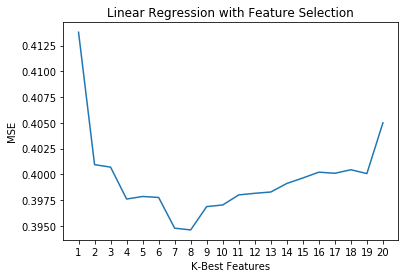

In [128]:
line = list(range(20))
line = [x+1 for x in line]
mse_list2=[]

for i in range(1, 21):

    # SelectKBest
    selector = SelectKBest(f_regression, k=i)
    selector.fit(X_construct_train, y_train)

    X_best_test = selector.transform(X_construct_test)
    X_best_train = selector.transform(X_construct_train)
    if i == 8:
        feature_idx = selector.get_support()
        feature_name = X_construct_train.columns[feature_idx]
        print(feature_name)

    # Run linear regression with all variables
    linear = LinearRegression(fit_intercept=True)
    linear.fit(X_best_train, y_train)
    gpa_pred = linear.predict(X_best_test)

    # Print results 
    print('MSE (%1.0f Best): = %2.4f' % (i, mean_squared_error(y_test, gpa_pred)))
    mse_list2.append(mean_squared_error(y_test, gpa_pred))

plt.plot(line, mse_list2)
plt.ylabel('MSE')
plt.xlabel('K-Best Features')
plt.title('Linear Regression with Feature Selection')
plt.xticks(np.arange(min(line), max(line)+1, 1.0))
plt.show()    

/Users/rachelanderson/anaconda/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.


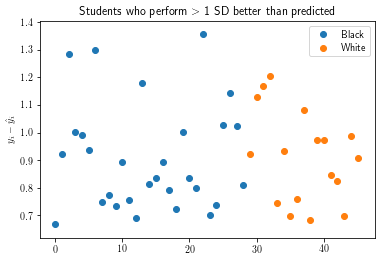

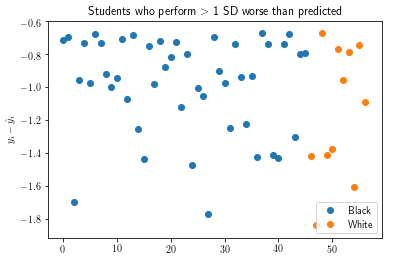

In [446]:
#Select the people who achieve better than expected, worse than expected for lasso

X_test = X_construct_test
X_test['lasso_pred'] = lasso_pred
#selecting people who outperform predictions >1 SD
over_indices = [value[0] - lasso_pred[index] > 0.6653 for index,value in enumerate(y_test.values)]
over_x = X_test[over_indices]
over_y = y_test[over_indices]
#selecting people who underperform predictions by >1 SD
under_indices = [value[0] - lasso_pred[index] < -0.6653 for index,value in enumerate(y_test.values)]
under_x = X_test[under_indices]
under_y = y_test[under_indices]

#Create new workable dataframes
over_new = pd.DataFrame({'lasso_pred': over_x['lasso_pred'], 'gpa': [i[0] for i in over_y.values], 'white': over_x['cm1ethrace_1'], 'black': over_x['cm1ethrace_2']})
under_new =  pd.DataFrame({'lasso_pred': under_x['lasso_pred'], 'gpa': [i[0] for i in under_y.values], 'white': under_x['cm1ethrace_1'], 'black': under_x['cm1ethrace_2']})
over_dif = over_new['gpa']-over_new['lasso_pred']
under_dif = under_new['gpa']-under_new['lasso_pred']

#Separate by race
over_white = over_dif.loc[over_new['white'] == 1]
over_black = over_dif.loc[over_new['black'] == 1]
tempb = [i for i in range(over_black.shape[0])]
tempw = [i+len(tempb) for i in range(over_white.shape[0])]

# Plot people who are over-predicted
plt.scatter(tempb, over_black)
plt.scatter(tempw, over_white)
plt.rc('text', usetex=True)
plt.ylabel(r'$y_i - \hat{y}_i$')
plt.title('Students who perform $>$ 1 SD better than predicted')
plt.legend(['Black', 'White'])
plt.show()

#Plot for who the algorithm underpredicts
under_white = under_dif.loc[under_new['white'] == 1]
under_black = under_dif.loc[under_new['black'] == 1]
temp_b = [i for i in range(under_black.shape[0])]
temp_w = [i+len(temp_b) for i in range(under_white.shape[0])]

plt.scatter(temp_b, under_black)
plt.scatter(temp_w, under_white)
plt.rc('text', usetex=True)
plt.ylabel(r'$y_i - \hat{y}_i$')
plt.title('Students who perform $>$ 1 SD worse than predicted')
plt.legend(['Black', 'White'])
plt.show()
